In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)

In [67]:
import pandas as pd

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 70)

playerFrames = pd.read_csv('../scrape-parse/demo/parse/2023/playerFrames/blast-premier-fall-groups-2023-natus-vincere-vs-g2-bo3-qpKifIreD-H1wjvSAUFqcRnatus-vincere-vs-g2-m1-inferno.dem.csv')

pf = playerFrames[['tick', 'roundNum', 'seconds', 'side', 'name', 'x', 'y', 'z',
    'eyeX', 'eyeY', 'eyeZ', 'velocityX', 'velocityY', 'velocityZ',
    'hp', 'armor', 'activeWeapon',
    'flashGrenades', 'smokeGrenades', 'heGrenades', 'totalUtility',
    'isAlive', 'isReloading', 'isDefusing', 'isPlanting', 'isUnknown',
    'equipmentValue', 'equipmentValueRoundStart', 'hasHelmet',
    'hasDefuse', 'hasBomb'
    ]]

rounds = pd.read_csv('../scrape-parse/demo/parse/2023/rounds/blast-premier-fall-groups-2023-natus-vincere-vs-g2-bo3-qpKifIreD-H1wjvSAUFqcRnatus-vincere-vs-g2-m1-inferno.dem.csv')
rounds = rounds[['roundNum', 'tScore', "ctScore" ,'endTScore', 'endCTScore']]

kills = pd.read_csv("../scrape-parse/demo/parse/2023/kills/blast-premier-fall-groups-2023-natus-vincere-vs-g2-bo3-qpKifIreD-H1wjvSAUFqcRnatus-vincere-vs-g2-m1-inferno.dem.csv")

pf = pf.merge(rounds, on='roundNum')
pf["winsRounds"] = pf.apply(lambda x: 
    1 if ( (x['side'] == 'T') and (x['endTScore'] > x['tScore']) ) or ( (x['side'] == 'CT') and (x['endCTScore'] > x['ctScore']) )
    else 0, axis=1)

pf['kills'] = 0
pf['deaths'] = 0

for index, row in kills.iterrows():
    pf.loc[(pf['tick'] >= row['tick']) & (pf['name'] == row['attackerName']), 'kills'] += 1
    pf.loc[(pf['tick'] >= row['tick']) & (pf['name'] == row['victimName']), 'deaths'] += 1

pf.loc[pf['name'] == 'NiKo']

,tick,roundNum,seconds,side,name,x,y,z,eyeX,eyeY,eyeZ,velocityX,velocityY,velocityZ,hp,armor,activeWeapon,flashGrenades,smokeGrenades,heGrenades,totalUtility,isAlive,isReloading,isDefusing,isPlanting,isUnknown,equipmentValue,equipmentValueRoundStart,hasHelmet,hasDefuse,hasBomb,tScore,ctScore,endTScore,endCTScore,winsRounds,kills,deaths
6,9648,1,0.078125,T,NiKo,-1654.269775,542.005920,-63.219006,-1654.269775,542.005920,0.843555,61.392929,-44.838280,0.0,100,100,Flashbang,1,0,0,1,True,False,False,False,False,1050,200,False,False,True,0,0,1,0,1,0,0
19,9664,1,0.203125,T,NiKo,-1641.355469,532.573792,-63.587608,-1641.355469,532.573792,0.474953,133.039551,-97.165291,0.0,100,100,Flashbang,1,0,0,1,True,False,False,False,False,1050,200,False,False,True,0,0,1,0,1,0,0
25,9680,1,0.328125,T,NiKo,-1622.017822,518.450623,-63.968750,-1622.017822,518.450623,0.093811,170.008240,-124.165291,0.0,100,100,Flashbang,1,0,0,1,True,False,False,False,False,1050,200,False,False,True,0,0,1,0,1,0,0
39,9696,1,0.453125,T,NiKo,-1599.372192,501.911591,-63.968750,-1599.372192,501.911591,0.093811,189.047440,-138.070572,0.0,100,100,Flashbang,1,0,0,1,True,False,False,False,False,1050,200,False,False,True,0,0,1,0,1,0,0
47,9712,1,0.578125,T,NiKo,-1575.337158,483.937012,-63.968750,-1575.337158,483.937012,0.093811,179.038712,-157.306290,0.0,100,100,Flashbang,1,0,0,1,True,False,False,False,False,1050,200,False,False,True,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263350,573703,30,28.250000,CT,NiKo,2414.999023,402.841919,218.031250,2414.999023,402.841919,282.093811,0.000000,-128.531311,0.0,100,100,AK-47,0,1,0,1,True,False,False,False,False,5100,4450,True,True,False,15,14,16,14,0,18,20
263360,573719,30,28.375000,CT,NiKo,2414.999023,395.437653,218.031250,2414.999023,395.437653,282.093811,0.000000,-22.762699,0.0,100,100,AK-47,0,1,0,1,True,False,False,False,False,5100,4450,True,True,False,15,14,16,14,0,18,20
263370,573735,30,28.500000,CT,NiKo,2414.999023,394.903900,218.031250,2414.999023,394.903900,282.093811,0.000000,0.000000,0.0,50,91,AK-47,0,1,0,1,True,False,False,False,False,5100,4450,True,True,False,15,14,16,14,0,18,20
263382,573751,30,28.625000,CT,NiKo,2414.999023,393.041992,218.031250,2414.999023,393.041992,282.093811,0.000000,-50.418457,0.0,50,91,AK-47,0,1,0,1,True,False,False,False,False,5100,4450,True,True,False,15,14,16,14,0,18,20


<BarContainer object of 27 artists>

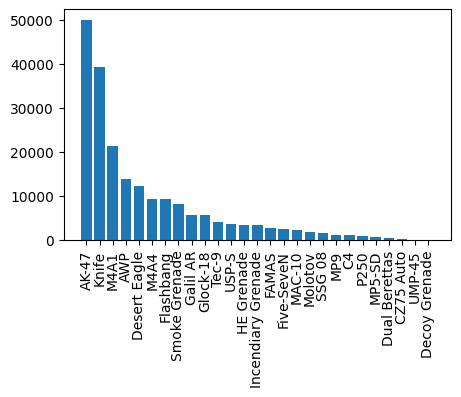

In [44]:
import matplotlib.pyplot as plt

asd = pd.DataFrame([pf.activeWeapon.value_counts().sort_values(ascending=False).index, pf.activeWeapon.value_counts().sort_values(ascending=False).values]).T
fig = plt.figure(figsize=(5, 3))
plt.xticks(rotation=90)
plt.bar(asd[0], asd[1])

In [73]:
from math import floor

# Create dummie cols
dummies = pd.get_dummies(pf['activeWeapon'], prefix="activeWeapon",drop_first=False)[['activeWeapon_AK-47','activeWeapon_Knife','activeWeapon_AWP','activeWeapon_M4A1','activeWeapon_Smoke Grenade','activeWeapon_M4A4','activeWeapon_Galil AR','activeWeapon_Desert Eagle','activeWeapon_Flashbang','activeWeapon_Glock-18','activeWeapon_USP-S']]
dummies = dummies*1
pf = pf.merge(dummies, left_index = True, right_index = True, how = 'left')

# Rounded-down seconds
pf['floorSec'] = pf['seconds'].apply(lambda x: floor(x))
pf[['roundNum', 'floorSec', 'seconds']].iloc[30000:30500]

,roundNum,floorSec,seconds
30000,4,86,86.90625
30001,4,86,86.90625
30002,4,86,86.90625
30003,4,86,86.90625
30004,4,86,86.90625
...,...,...,...
30495,4,93,93.03125
30496,4,93,93.03125
30497,4,93,93.03125
30498,4,93,93.03125


C:\Users\szmid\AppData\Local\Temp\ipykernel_17596\37965649.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(plotData['x'].head(10), plotData['y'].head(10), c='purple', cmap='viridis',s=2)
C:\Users\szmid\AppData\Local\Temp\ipykernel_17596\37965649.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(plotData['x'].iloc[10:20], plotData['y'].iloc[10:20], c='yellow', cmap='viridis',s=2)


(-1000.0, 4000.0)

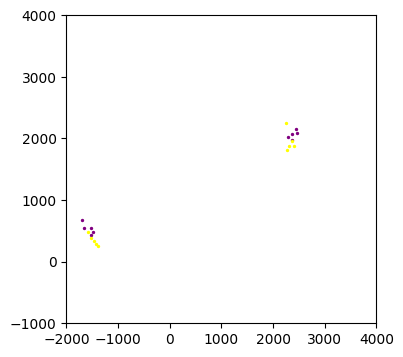

In [74]:
plotData = pf.drop_duplicates(subset=['floorSec', 'roundNum', 'name'])

plt.figure(figsize=(4,4))
plt.scatter(plotData['x'].head(10), plotData['y'].head(10), c='purple', cmap='viridis',s=2)
plt.scatter(plotData['x'].iloc[10:20], plotData['y'].iloc[10:20], c='yellow', cmap='viridis',s=2)
plt.xlim(-2000,4000)
plt.ylim(-1000,4000)

**A) Till this point**

The *secDf* dataframe contains the same information as *playerFrames*, but reduced to a second-by-second basis. 

**B) Next steps**

1. Separate the data to player-level and calculate player stats (kills, deaths in the match, etc.)
2. Check the nearest map-node for each player in each second
3. Copy / calculate graph-level features if nessesary (player alive on each side, remaining time, etc.), along with the target variable (win/loss)

In [77]:
# Separate players and create empty object
startAsCTPlayerNames = pf[(pf['side'] == 'CT') & (pf['roundNum'] == 1)]['name'].unique()
startAsTPlayerNames = pf[(pf['side'] == 'T') & (pf['roundNum'] == 1)]['name'].unique()
players = {}

# Team 1: start on CT side
players[0] = pf[pf['name'] == startAsCTPlayerNames[0]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[1] = pf[pf['name'] == startAsCTPlayerNames[1]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[2] = pf[pf['name'] == startAsCTPlayerNames[2]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[3] = pf[pf['name'] == startAsCTPlayerNames[3]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[4] = pf[pf['name'] == startAsCTPlayerNames[4]].drop_duplicates(subset=['floorSec','roundNum']).copy()

# Team 2: start on T side
players[5] = pf[pf['name'] == startAsTPlayerNames[0]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[6] = pf[pf['name'] == startAsTPlayerNames[1]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[7] = pf[pf['name'] == startAsTPlayerNames[2]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[8] = pf[pf['name'] == startAsTPlayerNames[3]].drop_duplicates(subset=['floorSec','roundNum']).copy()
players[9] = pf[pf['name'] == startAsTPlayerNames[4]].drop_duplicates(subset=['floorSec','roundNum']).copy()

for idx, player in enumerate(players):
    
    players[idx] = players[idx].replace(True, 1)
    players[idx] = players[idx].replace(False, 0)
    players[idx]['isCT'] = players[idx]['side'].apply(lambda x: 1 if x == 'CT' else 0)

    del players[idx]['side']
    del players[idx]['activeWeapon']
    del players[idx]['winsRounds']

In [78]:
players[0]

,tick,roundNum,seconds,name,x,y,z,eyeX,eyeY,eyeZ,velocityX,velocityY,velocityZ,hp,armor,flashGrenades,smokeGrenades,heGrenades,totalUtility,isAlive,isReloading,isDefusing,isPlanting,isUnknown,equipmentValue,equipmentValueRoundStart,hasHelmet,hasDefuse,hasBomb,tScore,ctScore,endTScore,endCTScore,kills,deaths,activeWeapon_AK-47_x,activeWeapon_Knife_x,activeWeapon_AWP_x,activeWeapon_M4A1_x,activeWeapon_Smoke Grenade_x,activeWeapon_M4A4_x,activeWeapon_Galil AR_x,activeWeapon_Desert Eagle_x,activeWeapon_Flashbang_x,activeWeapon_Glock-18_x,activeWeapon_USP-S_x,floorSec,activeWeapon_AK-47_y,activeWeapon_Knife_y,activeWeapon_AWP_y,activeWeapon_M4A1_y,activeWeapon_Smoke Grenade_y,activeWeapon_M4A4_y,activeWeapon_Galil AR_y,activeWeapon_Desert Eagle_y,activeWeapon_Flashbang_y,activeWeapon_Glock-18_y,activeWeapon_USP-S_y,activeWeapon_AK-47,activeWeapon_Knife,activeWeapon_AWP,activeWeapon_M4A1,activeWeapon_Smoke Grenade,activeWeapon_M4A4,activeWeapon_Galil AR,activeWeapon_Desert Eagle,activeWeapon_Flashbang,activeWeapon_Glock-18,activeWeapon_USP-S,isCT
0,9648,1,0.078125,Aleksib,2291.713867,2031.145874,128.031250,2291.713867,2031.145874,192.093811,-7.701770,77.791405,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
81,9776,1,1.078125,Aleksib,2257.619873,2250.425293,128.031250,2257.619873,2250.425293,192.093811,-119.223747,218.292725,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
160,9904,1,2.078125,Aleksib,2139.303467,2464.421875,128.031250,2139.303467,2464.421875,192.093811,-133.440170,209.520645,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
240,10032,1,3.078125,Aleksib,1984.614868,2656.071533,128.031250,1984.614868,2656.071533,192.093811,-201.938309,147.380188,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
323,10160,1,4.078125,Aleksib,1755.860107,2754.217285,127.873169,1755.860107,2754.217285,191.935730,-235.700089,48.875271,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260768,569555,30,98.023438,Aleksib,1808.623657,-73.985199,129.338638,2115.815674,-345.349792,131.076218,58.659725,-16.911407,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260849,569683,30,99.023438,Aleksib,1808.623657,-73.985199,129.338638,1947.831177,701.907715,224.093811,-1.382732,-0.726303,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260925,569811,30,100.023438,Aleksib,1808.623657,-73.985199,129.338638,1947.679077,701.828247,206.076218,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261008,569939,30,101.023438,Aleksib,1808.623657,-73.985199,129.338638,1947.679077,701.828247,206.076218,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
test = players[0].copy()
graph = 

In [79]:
def find_closest(row):
    distances = np.sqrt((df_B['b_x'] - row['x'])**2 + (df_B['b_y'] - row['y'])**2)
    return df_B.loc[distances.idxmin(), 'id']

df_A['closest_id'] = df_A.apply(find_closest, axis=1)


,tick,roundNum,seconds,name,x,y,z,eyeX,eyeY,eyeZ,velocityX,velocityY,velocityZ,hp,armor,flashGrenades,smokeGrenades,heGrenades,totalUtility,isAlive,isReloading,isDefusing,isPlanting,isUnknown,equipmentValue,equipmentValueRoundStart,hasHelmet,hasDefuse,hasBomb,tScore,ctScore,endTScore,endCTScore,kills,deaths,activeWeapon_AK-47_x,activeWeapon_Knife_x,activeWeapon_AWP_x,activeWeapon_M4A1_x,activeWeapon_Smoke Grenade_x,activeWeapon_M4A4_x,activeWeapon_Galil AR_x,activeWeapon_Desert Eagle_x,activeWeapon_Flashbang_x,activeWeapon_Glock-18_x,activeWeapon_USP-S_x,floorSec,activeWeapon_AK-47_y,activeWeapon_Knife_y,activeWeapon_AWP_y,activeWeapon_M4A1_y,activeWeapon_Smoke Grenade_y,activeWeapon_M4A4_y,activeWeapon_Galil AR_y,activeWeapon_Desert Eagle_y,activeWeapon_Flashbang_y,activeWeapon_Glock-18_y,activeWeapon_USP-S_y,activeWeapon_AK-47,activeWeapon_Knife,activeWeapon_AWP,activeWeapon_M4A1,activeWeapon_Smoke Grenade,activeWeapon_M4A4,activeWeapon_Galil AR,activeWeapon_Desert Eagle,activeWeapon_Flashbang,activeWeapon_Glock-18,activeWeapon_USP-S,isCT
0,9648,1,0.078125,Aleksib,2291.713867,2031.145874,128.031250,2291.713867,2031.145874,192.093811,-7.701770,77.791405,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
81,9776,1,1.078125,Aleksib,2257.619873,2250.425293,128.031250,2257.619873,2250.425293,192.093811,-119.223747,218.292725,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
160,9904,1,2.078125,Aleksib,2139.303467,2464.421875,128.031250,2139.303467,2464.421875,192.093811,-133.440170,209.520645,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
240,10032,1,3.078125,Aleksib,1984.614868,2656.071533,128.031250,1984.614868,2656.071533,192.093811,-201.938309,147.380188,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
323,10160,1,4.078125,Aleksib,1755.860107,2754.217285,127.873169,1755.860107,2754.217285,191.935730,-235.700089,48.875271,0.0,100,0,0,0,0,0,1,0,0,0,0,400,200,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260768,569555,30,98.023438,Aleksib,1808.623657,-73.985199,129.338638,2115.815674,-345.349792,131.076218,58.659725,-16.911407,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260849,569683,30,99.023438,Aleksib,1808.623657,-73.985199,129.338638,1947.831177,701.907715,224.093811,-1.382732,-0.726303,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260925,569811,30,100.023438,Aleksib,1808.623657,-73.985199,129.338638,1947.679077,701.828247,206.076218,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261008,569939,30,101.023438,Aleksib,1808.623657,-73.985199,129.338638,1947.679077,701.828247,206.076218,0.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,2600,200,0,0,0,15,14,16,14,18,20,0,0,0,0,0,0,0,0,0,0,0,101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
